In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os
os.getcwd()

'd:\\Users\\G S VASU\\Desktop\\Abhirama\\IIT Kharagpur\\Projects\\Irrigation Scheduling\\1959 Evapotranspiration Model'

In [36]:
data = pd.read_csv('UC Davis Campbell Tract Evapotranspiration Ground Truth Data.csv')

In [37]:
data.describe()

,Altitude,ETo,Rs,max_temp,min_temp,mean_temp,max_RH,min_RH,mean_RH,U2,n/N
count,1.461000e+03,1382.000000,1460.000000,1460.000000,1460.000000,1461.000000,1437.000000,1434.000000,1437.000000,1442.000000,1447.000000
mean,1.828800e+01,142.550651,456.572603,72.819178,45.517123,59.165640,92.641614,39.398884,66.083159,123.341193,0.848576
std,3.553930e-15,97.246076,224.222864,15.584923,9.264544,11.662283,14.223995,20.994929,14.476913,76.343066,2.578202
min,1.828800e+01,0.000000,22.000000,31.000000,20.000000,29.000000,18.000000,1.000000,11.500000,1.000000,0.000000
25%,1.828800e+01,55.250000,264.000000,60.000000,39.000000,50.000000,92.000000,24.000000,59.000000,72.250000,0.670000
50%,1.828800e+01,128.000000,470.000000,72.000000,47.000000,59.000000,100.000000,34.000000,65.000000,108.000000,0.990000
75%,1.828800e+01,220.000000,665.000000,85.250000,52.000000,68.500000,100.000000,49.000000,73.500000,151.000000,1.000000
max,1.828800e+01,535.000000,810.000000,110.000000,74.000000,87.500000,100.000000,100.000000,100.000000,755.000000,98.000000


In [38]:
data.shape

(1461, 16)

In [39]:
def convert_to_radians(angle):
    angle = str(angle)  # Convert angle to string
    parts = angle.split('°')
    degrees = int(parts[0])
    minutes = int(parts[1].rstrip('\''))
    total_minutes = degrees * 60 + minutes
    radians = math.radians(total_minutes / 60)
    return radians
data['Latitude'] = data['Latitude'].apply(convert_to_radians)
data['Longitude'] = data['Longitude'].apply(convert_to_radians)

In [40]:
data.isnull().sum()/data.shape[0]

Date         0.000000
Altitude     0.000000
Latitude     0.000000
Longitude    0.000000
ETo          0.054073
Rn           0.327173
Rs           0.000684
max_temp     0.000684
min_temp     0.000684
mean_temp    0.000000
max_RH       0.016427
min_RH       0.018480
mean_RH      0.016427
U2           0.013005
n/N          0.009582
rainfall     0.824093
dtype: float64

In [41]:
#fill the null values of data['rainfall'] with 0
data['rainfall'] = data['rainfall'].fillna(0)

In [42]:
data

,Date,Altitude,Latitude,Longitude,ETo,Rn,Rs,max_temp,min_temp,mean_temp,max_RH,min_RH,mean_RH,U2,n/N,rainfall
0,7/1/1959,18.288,0.672534,2.125229,310.0,NaN,746.0,97.0,53.0,75.0,100.0,17.0,58.5,154.0,1.00,0
1,7/2/1959,18.288,0.672534,2.125229,328.0,NaN,763.0,89.0,50.0,69.5,100.0,25.0,62.5,184.0,1.00,0
2,7/3/1959,18.288,0.672534,2.125229,224.0,NaN,759.0,93.0,52.0,72.5,100.0,16.0,58.0,65.0,1.00,0
3,7/4/1959,18.288,0.672534,2.125229,320.0,NaN,752.0,95.0,55.0,75.0,100.0,18.0,59.0,113.0,1.00,0
4,7/5/1959,18.288,0.672534,2.125229,292.0,NaN,756.0,94.0,53.0,73.5,88.0,24.0,56.0,138.0,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6/26/1963,18.288,0.672534,2.125229,293.0,376.70,780.0,85.0,51.0,68.0,90.0,22.0,56.0,238.0,1.00,0
1457,6/27/1963,18.288,0.672534,2.125229,234.0,366.30,800.0,69.0,53.0,61.0,94.0,52.0,73.0,210.0,1.00,0
1458,6/28/1963,18.288,0.672534,2.125229,235.0,350.00,750.0,75.0,48.0,61.5,92.0,28.0,60.0,165.0,0.67,0
1459,6/29/1963,18.288,0.672534,2.125229,281.0,390.70,788.0,81.0,50.0,65.5,94.0,24.0,59.0,127.0,1.00,0


In [43]:
data.dropna(axis=0,how='any',inplace=True)

In [44]:
data.shape

(887, 16)

In [45]:
data['ETo'] = data['ETo']*25.4/1000
data['Solar Radiation'] = data['Rs']*41868/1000000
data['max_temp'] = (data['max_temp'] - 32)*5/9
data['min_temp'] = (data['min_temp'] - 32)*5/9
data['wind_speed'] = data['U2'].astype('float')*0.067056

In [46]:
data['max_DPT'] = (4030 * (235 + data['max_temp']) / (4030 - ((data['max_temp'] + 235) * np.log(data['max_RH'] / 100)))) - 235
data['min_DPT'] = (4030 * (235 + data['min_temp']) / (4030 - ((data['min_temp'] + 235) * np.log(data['min_RH'] / 100)))) - 235

In [48]:
data['mean_DPT'] = (data['max_DPT'] + data['min_DPT'])/2

In [51]:
data['Julian Day'] = data['Date'].astype('datetime64[ns]').dt.dayofyear

In [53]:
data['solar_dec'] = 0.409 * np.sin((2 * math.pi * data['Julian Day']/ 365) - 1.39)
data['dr'] = 1 + 0.033 * np.cos(2 * math.pi * data['Julian Day'] / 365)
data['ws'] = np.arccos(-np.tan(data['Latitude']) * np.tan(data['solar_dec']))
data['N'] = 24 * data['ws'] / math.pi

In [54]:
data['sunshine hours'] = data['N']*data['n/N']

In [52]:
data

,Date,Altitude,Latitude,Longitude,ETo,Rn,Rs,max_temp,min_temp,mean_temp,...,mean_RH,U2,n/N,rainfall,Solar Radiation,wind_speed,max_DPT,min_DPT,mean_DPT,Julian Day
196,1/13/1960,18.288,0.672534,2.125229,1.2700,53.90,256.0,8.888889,3.333333,43.0,...,66.0,176.0,0.69,0.54,10.718208,11.801856,8.888889,-11.713058,-1.412084,13
199,1/16/1960,18.288,0.672534,2.125229,1.4224,59.90,286.0,11.666667,-1.111111,41.5,...,69.0,107.0,1.00,0,11.974248,7.174992,11.666667,-13.546945,-0.940139,16
200,1/17/1960,18.288,0.672534,2.125229,0.6350,89.90,227.0,10.555556,0.555556,42.0,...,75.0,28.0,0.96,0,9.504036,1.877568,10.555556,-8.616335,0.969610,17
201,1/18/1960,18.288,0.672534,2.125229,0.4572,70.40,99.0,7.777778,2.222222,41.0,...,79.0,61.0,0.06,0,4.144932,4.090416,7.777778,-5.147952,1.314913,18
202,1/19/1960,18.288,0.672534,2.125229,0.7874,97.40,227.0,12.222222,1.666667,44.5,...,72.5,64.0,0.69,0,9.504036,4.291584,12.222222,-8.934308,1.643957,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6/26/1963,18.288,0.672534,2.125229,7.4422,376.70,780.0,29.444444,10.555556,68.0,...,56.0,238.0,1.00,0,32.657040,15.959328,27.628722,-10.185530,8.721596,177
1457,6/27/1963,18.288,0.672534,2.125229,5.9436,366.30,800.0,20.555556,11.666667,61.0,...,73.0,210.0,1.00,0,33.494400,14.081760,19.556745,2.173723,10.865234,178
1458,6/28/1963,18.288,0.672534,2.125229,5.9690,350.00,750.0,23.888889,8.888889,61.5,...,60.0,165.0,0.67,0,31.401000,11.064240,22.509547,-8.555861,6.976843,179
1459,6/29/1963,18.288,0.672534,2.125229,7.1374,390.70,788.0,27.222222,10.000000,65.5,...,59.0,127.0,1.00,0,32.991984,8.516112,26.170728,-9.559277,8.305726,180


In [56]:
data = data[['max_temp','min_temp','mean_temp','max_RH','min_RH','mean_RH',
       'max_DPT', 'min_DPT', 'mean_DPT','wind_speed','Solar Radiation','rainfall','ETo']]

In [ ]:
columns_order = ['max_temp', 'min_temp', 'mean_temp', 'max_RH', 'min_RH', 'mean_RH',
       'max_DPT', 'min_DPT', 'mean_DPT', 'wind_speed', 'rainfall',
       'sunshine hours', 'evaporation', 'Solar Radiation', 'ETo']

In [ ]:
columns_to_check = ['Solar Radiation', 'min_RH', 'wind_speed']
data = data.loc[~data[columns_to_check].apply(lambda x: x.apply(lambda y: isinstance(y, str))).any(axis=1)]

In [58]:
X = data.drop(['ETo'],axis=1)
Y = data.ETo

In [61]:
import os
os.getcwd()

os.chdir('D:\\Users\\G S VASU\\Desktop\\Abhirama\\IIT Kharagpur\\Projects\\Irrigation Scheduling\\25 Stations Weather Data')

In [62]:
import pickle
with open('weather data regressor.pickle','rb') as f:
  model = pickle.load(f)

In [63]:
model

RandomForestRegressor(max_depth=100, n_estimators=400, random_state=42)

In [64]:
model.score(X,Y)

ValueError: could not convert string to float: 'T'

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(data1[['ETo']],data1[['Reference ETo']])

2.8463244616960646

In [ ]:
data1[['ETo','Reference ETo']]

,ETo,Reference ETo
0,7.8740,8.647781
1,8.3312,7.380042
2,5.6896,6.921287
3,8.1280,7.977135
4,7.4168,7.944276
...,...,...
544,0.2540,0.251413
545,1.8542,5.015672
547,0.6858,1.101693
548,0.7366,1.338376


In [ ]:
y_prediction = model.predict(x)

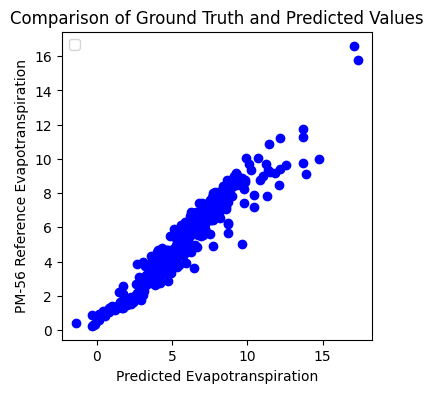

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(y_prediction, y, color='blue')
plt.xlabel('Predicted Evapotranspiration')
plt.ylabel('PM-56 Reference Evapotranspiration')
plt.title('Comparison of Ground Truth and Predicted Values')
plt.legend()
plt.show()